Import Data

In [383]:
import pandas as pd
df=pd.read_csv("/content/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [384]:
df.shape

(13320, 9)

checking null value & type

In [385]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [386]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [387]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

#DATA CLEANING

In [388]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [389]:
x=df["size"]
x.head()

0        2 BHK
1    4 Bedroom
2        3 BHK
3        3 BHK
4        2 BHK
Name: size, dtype: object

In [390]:
df['BHK']=df["size"].str.split(expand=True)[0]

In [391]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [392]:
df.drop("size",axis=1,inplace=True)

In [393]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

cleaning multing string to number

In [394]:
def is_float(x):
  dub=x.split("-")
  if len(dub)==2:
    return (float(dub[0])+float(dub[1]))/2
  try:
    return float(x)
  except:
    return None

In [395]:
df["total_sqft"]=df["total_sqft"].apply(is_float)

In [396]:
df["total_sqft"].isna().sum()

46

Filtering Data

In [397]:
df=df[['area_type','location','total_sqft','bath','balcony','BHK','price']]
df.head()

,area_type,location,total_sqft,bath,balcony,BHK,price
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,2,39.07
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,4,120.00
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,3,62.00
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,3,95.00
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,2,51.00


In [398]:
df.isna().sum()

area_type       0
location        1
total_sqft     46
bath           73
balcony       609
BHK            16
price           0
dtype: int64

In [399]:
df.balcony.fillna(df.balcony.median(),inplace=True)


In [400]:
df.bath.median()

2.0

In [401]:
df.isna().sum()

area_type      0
location       1
total_sqft    46
bath          73
balcony        0
BHK           16
price          0
dtype: int64

Due to large data droping all NaN value

In [402]:
df.dropna(inplace=True)

In [403]:
df.isna().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
BHK           0
price         0
dtype: int64

CHANGING DTYPE

In [404]:
df.dtypes

area_type      object
location       object
total_sqft    float64
bath          float64
balcony       float64
BHK            object
price         float64
dtype: object

In [405]:
df.BHK=df.BHK.astype(int)

In [406]:
df.dtypes

area_type      object
location       object
total_sqft    float64
bath          float64
balcony       float64
BHK             int64
price         float64
dtype: object

VISULATION AND CLEANING

In [407]:
import seaborn as sn

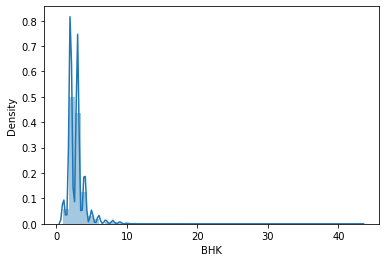

In [408]:
sn.distplot(df.BHK)

In [409]:
df.BHK.value_counts()

2     5517
3     4818
4     1390
1      640
5      349
6      220
7      100
8       88
9       52
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: BHK, dtype: int64

In [410]:
df=df[df.BHK<10]

In [411]:
df=df[df.total_sqft/df.BHK>300]

In [412]:
df.groupby("BHK")["bath"].sum()

BHK
1      671.0
2    10812.0
3    13026.0
4     4624.0
5      943.0
6      498.0
7      260.0
8      160.0
9      134.0
Name: bath, dtype: float64

In [413]:
df=df[df.bath<df.BHK+1]

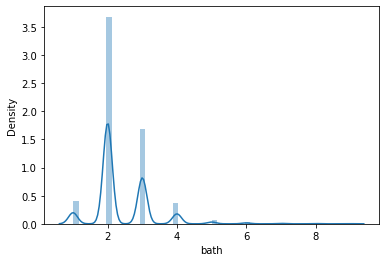

In [414]:
sn.distplot(df.bath)

Creating price per squre meter

In [415]:
df["price/sqmtr"]=df.price*100000/df.total_sqft

Change price to Lakhs

In [416]:
df["price"]=df.price*100000

In [417]:
df.shape

(11475, 8)

In [418]:
df.location.apply(lambda x: x.strip())

0        Electronic City Phase II
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
5                      Whitefield
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 11475, dtype: object

Dimensionality Reduction

In [419]:
len(df.location.unique())

1147

In [420]:
location_stats=df.location.value_counts()


In [421]:
reducelocation=location_stats[location_stats<10]

In [422]:
len(reducelocation)

926

In [423]:
df.location=df.location.apply(lambda x: "other" if x in reducelocation else x)

In [424]:
len(df.location.unique())

222

In [425]:
df['price/sqmtr'].describe()

count     11475.000000
mean       5991.610914
std        3810.418911
min         267.829813
25%        4156.423002
50%        5164.319249
75%        6607.900552
max      176470.588235
Name: price/sqmtr, dtype: float64

Above minimum and maximum price is outof Range

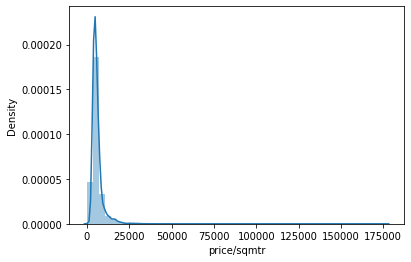

In [426]:
sn.distplot(df["price/sqmtr"])

In [427]:
import numpy as np
high_outlier=df["price/sqmtr"].mean()+(df["price/sqmtr"].std())
high_outlier

9802.029825118052

In [428]:

low_outlier=df["price/sqmtr"].mean()-(df["price/sqmtr"].std())
low_outlier

2181.192003865773

In [429]:
df=df[(df["price/sqmtr"]>low_outlier)&(df["price/sqmtr"]<high_outlier)]
df

,area_type,location,total_sqft,bath,balcony,BHK,price,price/sqmtr
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,2,3907000.0,3699.810606
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,3,6200000.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,3,9500000.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,2,5100000.0,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,2,3800000.0,3247.863248
...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Uttarahalli,1345.0,2.0,1.0,3,5700000.0,4237.918216
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,3.0,3,11200000.0,6530.612245
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,5,23100000.0,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,2,6000000.0,5258.545136


In [430]:
df["price/sqmtr"].describe()

count    10494.000000
mean      5215.583348
std       1519.581174
min       2181.818182
25%       4068.228410
50%       5000.000000
75%       6170.216452
max       9797.297297
Name: price/sqmtr, dtype: float64

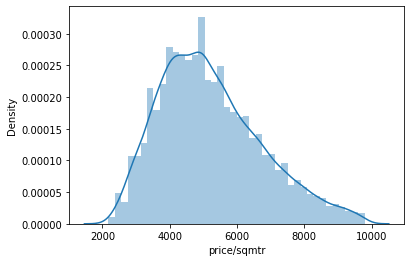

In [431]:
sn.distplot(df["price/sqmtr"])

In [432]:
df.price.describe()

count    1.049400e+04
mean     7.665651e+06
std      5.703127e+06
min      1.000000e+06
25%      4.600000e+06
50%      6.300000e+06
75%      9.000000e+06
max      2.100000e+08
Name: price, dtype: float64

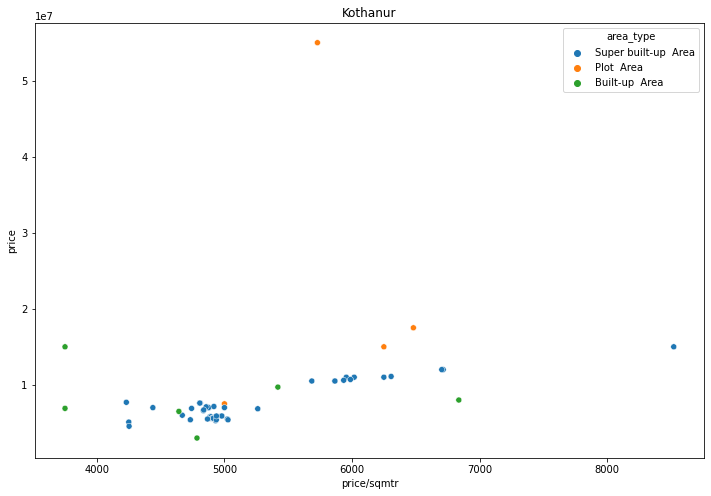

In [433]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title("Kothanur")
sn.scatterplot(data=df[(df['location']=="Kothanur")],x="price/sqmtr",y="price",hue="area_type")

In [434]:
df.corr()

,total_sqft,bath,balcony,BHK,price,price/sqmtr
total_sqft,1.000000,0.634256,0.209819,0.637219,0.901234,0.233506
bath,0.634256,1.000000,0.273821,0.882908,0.566702,0.225841
balcony,0.209819,0.273821,1.000000,0.267852,0.175733,0.035118
BHK,0.637219,0.882908,0.267852,1.000000,0.546411,0.180107
price,0.901234,0.566702,0.175733,0.546411,1.000000,0.579555
price/sqmtr,0.233506,0.225841,0.035118,0.180107,0.579555,1.000000


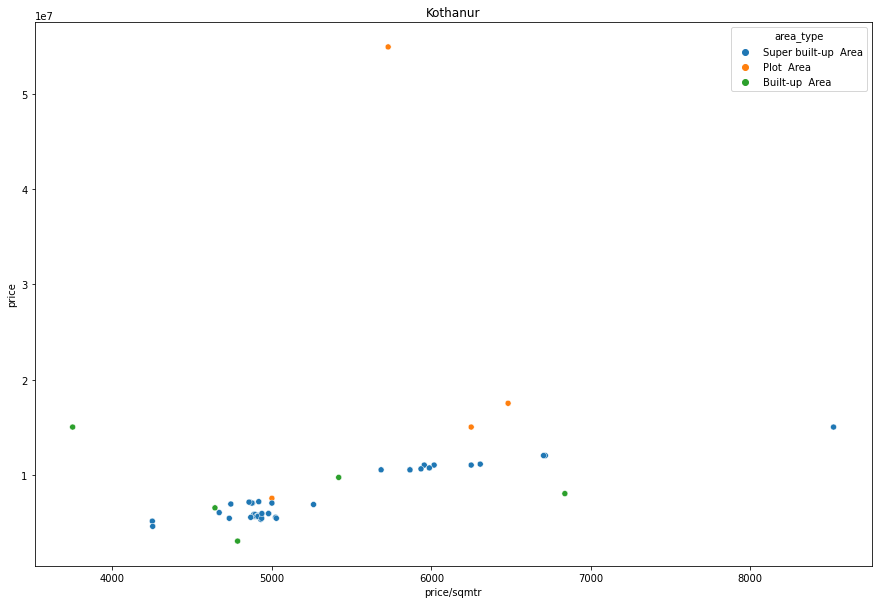

In [435]:
plt.figure(figsize=(15,10))
plt.title("Kothanur")
sn.scatterplot(data=df8[df8['location']=="Kothanur"],x="price/sqmtr",y="price",hue="area_type")

In [436]:
df=df[df.balcony<df.BHK]

In [437]:
df.describe()

,total_sqft,bath,balcony,BHK,price,price/sqmtr
count,7017.000000,7017.000000,7017.000000,7017.000000,7.017000e+03,7017.000000
mean,1520.180404,2.471854,1.290865,2.698019,8.428055e+06,5334.020353
std,881.763212,0.840696,0.675494,0.861827,6.526710e+06,1556.439156
min,360.000000,1.000000,0.000000,1.000000,1.166000e+06,2200.000000
25%,1125.000000,2.000000,1.000000,2.000000,5.000000e+06,4181.818182
50%,1325.000000,2.000000,1.000000,3.000000,6.800000e+06,5134.099617
75%,1660.000000,3.000000,2.000000,3.000000,9.900000e+06,6333.333333
max,30400.000000,9.000000,3.000000,9.000000,2.100000e+08,9797.297297


In [438]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["area_type"]=le.fit_transform(df["area_type"])

In [439]:
df["location"]=le.fit_transform(df["location"])

In [440]:
df.head()

,area_type,location,total_sqft,bath,balcony,BHK,price,price/sqmtr
0,3,70,1056.0,2.0,1.0,2,3907000.0,3699.810606
3,3,146,1521.0,3.0,1.0,3,9500000.0,6245.890861
4,3,139,1200.0,2.0,1.0,2,5100000.0,4250.000000
5,3,213,1170.0,2.0,1.0,2,3800000.0,3247.863248
6,3,168,2732.0,4.0,2.0,4,20400000.0,7467.057101


In [441]:
df.dtypes

area_type        int64
location         int64
total_sqft     float64
bath           float64
balcony        float64
BHK              int64
price          float64
price/sqmtr    float64
dtype: object

Above data are prefect dtype

In [442]:
x=df[["area_type",'location','total_sqft','bath','balcony',"BHK"]]
y=df["price"]

In [443]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.7)

In [444]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [445]:
reg.score(x_test,y_test)

0.86304041469618

**Use K Fold cross validation to measure accuracy of our LinearRegression**

In [446]:
from sklearn.model_selection import cross_val_score
clf=cross_val_score(LinearRegression(),x,y,cv=6)
clf.mean()

0.8137040576735065

In [447]:
from sklearn.tree import DecisionTreeRegressor
clf=cross_val_score(DecisionTreeRegressor(),x,y,cv=6)
clf.mean()

0.6815111960495169

**Find best model using GridSearchCV**

In [448]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [449]:
model={
    "linerReg":{
        "model":LinearRegression(),
        "param":{
            'normalize':['deprecated',True,False]
        }
    },
    "svr":{
        "model":SVR(),
        "param":{
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            "C":[1,10,20,100]
        }
    },
    "lasso":{
        "model": Lasso(),
        "param":{
            "alpha": [1,2,3],
            'selection' : ['cyclic', 'random']
        }
    },
    "DecisionTree":{
        "model":DecisionTreeRegressor(),
        "param":{
            'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
            'splitter' : ["best", "random"]
        }
    }
}

In [450]:
from sklearn.model_selection import GridSearchCV

In [451]:
score=[]
for mod,para in model.items():
  clf=GridSearchCV(para["model"],para["param"],cv=5)
  clf.fit(x,y)
  score.append({
      
      "best":clf.best_estimator_,
      "best score":clf.best_score_,
      "best_param":clf.best_params_
  })
 


In [452]:
pd.DataFrame(score)

,best,best score,best_param
0,LinearRegression(),0.816496,{'normalize': 'deprecated'}
1,"SVR(C=100, kernel='linear')",0.810235,"{'C': 100, 'kernel': 'linear'}"
2,"Lasso(alpha=1, selection='random')",0.816496,"{'alpha': 1, 'selection': 'random'}"
3,DecisionTreeRegressor(),0.721201,"{'criterion': 'squared_error', 'splitter': 'be..."


**Based on above results we can say that LinearRegression & Lasso gives the best score. Hence we will use that**

lets check RandomForest also

In [453]:

rand=cross_val_score(RandomForestRegressor(),x,y,cv=6)
rand.mean()

0.8175423833133465

In [454]:
import warnings
warnings.filterwarnings("ignore")

In [455]:
x_train

,area_type,location,total_sqft,bath,balcony,BHK
5660,3,219,850.0,2.0,1.0,2
3663,3,92,1132.0,2.0,1.0,2
13053,0,219,1256.0,2.0,1.0,2
2308,0,219,2300.0,3.0,2.0,3
4854,3,78,1751.0,2.0,1.0,3
...,...,...,...,...,...,...
11051,0,100,1320.0,2.0,2.0,3
4514,3,152,1360.0,2.0,1.0,2
2746,3,213,1118.0,2.0,1.0,2
9639,3,219,1275.0,3.0,2.0,3


In [456]:
#area_type	location	total_sqft	bath	balcony	BHK
reg.predict([[3,65,964.0,2.0,1.0,2]])

array([4959666.85817954])

In [457]:
#area_type	location	total_sqft	bath	balcony	BHK
reg.predict([[3,65,964.0,2.0,2.0,3]])

array([4306969.35129918])

In [458]:
#area_type	location	total_sqft	bath	balcony	BHK
reg.predict([[5,65,964.0,2.0,2.0,1]])

array([6337104.89511958])

In [459]:
#area_type	location	total_sqft	bath	balcony	BHK
reg.predict([[8,65,1964.0,2.0,2.0,2]])

array([12277033.90084862])

#Export the tested model to a joblib file

In [460]:
import joblib
joblib.dump(reg,"bangaloreLiner")

['bangaloreLiner']

In [461]:
joblib.dump(rand,"bangaloreRandFrst")

['bangaloreRandFrst']